<a href="https://colab.research.google.com/github/AenimaLabs/TelecomX2/blob/main/TelecomX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telecom X – Parte 2: Predicción de Cancelación (Churn)

📣 Historia del Desafío

¡Felicidades! 🎉 Has sido promovido después de tu excelente desempeño en el análisis exploratorio de la cancelación de clientes en Telecom X. Tu dedicación, claridad al comunicar los datos y visión estratégica marcaron la diferencia.

Ahora, ¡has sido invitado oficialmente a formar parte del equipo de Machine Learning de la empresa!

🎯 Misión

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

🧠 Objetivos del Desafío

Preparar los datos para el modelado (tratamiento, codificación, normalización).

Realizar análisis de correlación y selección de variables.

Entrenar dos o más modelos de clasificación.

Evaluar el rendimiento de los modelos con métricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

##Cargando CSV

In [4]:
import pandas as pd

ruta = 'https://raw.githubusercontent.com/AenimaLabs/TelecomX2/refs/heads/main/df_clean.csv'
df = pd.read_csv(ruta)

In [5]:
df.head()

,ID_Cliente,Abandono,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario,Cantidad_Servicios
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,1,1,0,Un año,1,Cheque por correo,65.6,593.30,2.19,3
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,1,Mes a mes,0,Cheque por correo,59.9,542.40,2.00,1
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra Óptica,...,0,0,0,Mes a mes,1,Cheque electrónico,73.9,280.85,2.46,1
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra Óptica,...,0,1,1,Mes a mes,1,Cheque electrónico,98.0,1237.85,3.27,4
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fibra Óptica,...,1,1,0,Mes a mes,1,Cheque por correo,83.9,267.40,2.80,2


In [6]:
df.columns

Index(['ID_Cliente', 'Abandono', 'Genero', 'Adulto_Mayor', 'Tiene_Pareja',
       'Tiene_Dependientes', 'Meses_Contrato', 'Servicio_Telefonico',
       'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online',
       'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
       'Streaming_TV', 'Streaming_Peliculas', 'Tipo_Contrato',
       'Factura_Electronica', 'Metodo_Pago', 'Cargo_Mensual', 'Cargo_Total',
       'Cargo_Diario', 'Cantidad_Servicios'],
      dtype='object')

##Eliminación de Columnas Irrelevantes

In [7]:
columnas_a_eliminar = ['ID_Cliente']
df_limpio = df.drop(columns=columnas_a_eliminar)
print(df_limpio.columns.to_list())

['Abandono', 'Genero', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Meses_Contrato', 'Servicio_Telefonico', 'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Tipo_Contrato', 'Factura_Electronica', 'Metodo_Pago', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario', 'Cantidad_Servicios']


In [9]:
df_limpio.head(3)

,Abandono,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,Seguridad_Online,...,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario,Cantidad_Servicios
0,0,Femenino,0,1,1,9,1,0,DSL,0,...,1,1,0,Un año,1,Cheque por correo,65.6,593.30,2.19,3
1,0,Masculino,0,0,0,9,1,1,DSL,0,...,0,0,1,Mes a mes,0,Cheque por correo,59.9,542.40,2.00,1
2,1,Masculino,0,0,0,4,1,0,Fibra Óptica,0,...,0,0,0,Mes a mes,1,Cheque electrónico,73.9,280.85,2.46,1


##Encoding
Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [10]:
# Aplicar one-hot encoding a las variables categóricas
df_encoded = pd.get_dummies(
    df_limpio,
    columns=['Genero', 'Servicio_Internet', 'Tipo_Contrato', 'Metodo_Pago'],
    prefix=['Genero', 'Internet', 'Contrato', 'Pago'],  # prefijos para claridad
    drop_first=False  # mantenemos todas las categorías (evita colinealidad más adelante si se usa regresión)
)

# Mostrar nuevas columnas
print("Columnas después de one-hot encoding:")
print(df_encoded.columns.tolist())

Columnas después de one-hot encoding:
['Abandono', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Meses_Contrato', 'Servicio_Telefonico', 'Multiples_Lineas', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Factura_Electronica', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario', 'Cantidad_Servicios', 'Genero_Femenino', 'Genero_Masculino', 'Internet_DSL', 'Internet_Fibra Óptica', 'Internet_Sin Internet', 'Contrato_Dos años', 'Contrato_Mes a mes', 'Contrato_Un año', 'Pago_Cheque electrónico', 'Pago_Cheque por correo', 'Pago_Tarjeta de crédito', 'Pago_Transferencia bancaria']


In [11]:
df_encoded.head(3)

,Abandono,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,...,Internet_DSL,Internet_Fibra Óptica,Internet_Sin Internet,Contrato_Dos años,Contrato_Mes a mes,Contrato_Un año,Pago_Cheque electrónico,Pago_Cheque por correo,Pago_Tarjeta de crédito,Pago_Transferencia bancaria
0,0,0,1,1,9,1,0,0,1,0,...,True,False,False,False,False,True,False,True,False,False
1,0,0,0,0,9,1,1,0,0,0,...,True,False,False,False,True,False,False,True,False,False
2,1,0,0,0,4,1,0,0,0,1,...,False,True,False,False,True,False,True,False,False,False


##Verificación de la Proporción de Cancelación (Churn)

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [12]:
# Conteo absoluto
conteo_abandono = df_encoded['Abandono'].value_counts().sort_index()

# Proporciones
proporcion_abandono = df_encoded['Abandono'].value_counts(normalize=True).sort_index()

# Mostrar resultados
print("Conteo de clientes por clase:")
print(conteo_abandono)
print("\nProporción de clientes por clase:")
print(proporcion_abandono)

Conteo de clientes por clase:
Abandono
0    5174
1    1869
Name: count, dtype: int64

Proporción de clientes por clase:
Abandono
0    0.73463
1    0.26537
Name: proportion, dtype: float64


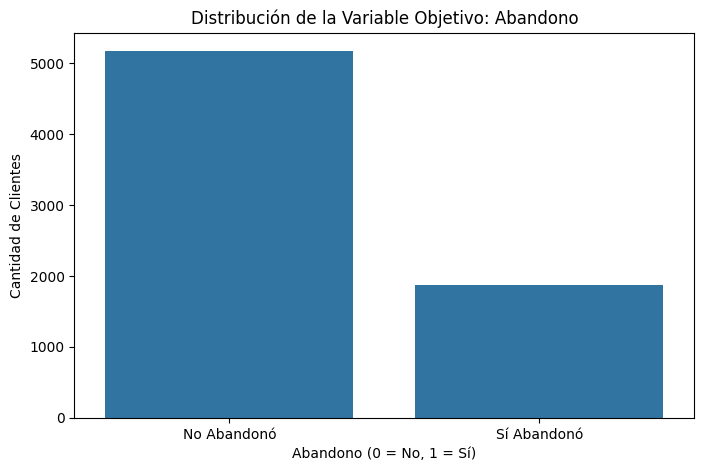

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.countplot(data=df_encoded, x='Abandono')
plt.title('Distribución de la Variable Objetivo: Abandono')
plt.xlabel('Abandono (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Clientes')
plt.xticks([0, 1], ['No Abandonó', 'Sí Abandonó'])
plt.show()

###🔺 Hay desbalance: 79% - 21%
###🟡 No es extremo, pero requiere atención en la evaluación del modelo
###🎯 Objetivo: Maximizar el recall de la clase 1 (Abandono) → Queremos detectar la mayor cantidad posible de cancelaciones reales, aunque a costa de algunos falsos positivos.

###Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [14]:
#vamos a crear dos versiones, una sin  escalar para Decision Tree, Random Forest y XGBoost
#y otra para KNN, SVM, Regresión Logística y Redes Neuronales,

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separar características y variable objetivo
X = df_encoded.drop(columns=['Abandono'])
y = df_encoded['Abandono']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identificar columnas numéricas que necesitan escalamiento
columnas_numericas = ['Meses_Contrato', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario']

# Crear copia escalada solo si se necesita
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[columnas_numericas] = scaler.fit_transform(X_train[columnas_numericas])
X_test_scaled[columnas_numericas] = scaler.transform(X_test[columnas_numericas])

## Análisis de Correlación
Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarnos de que todas las columnas sean numéricas (deben serlo tras one-hot)
df_numeric = df_encoded.select_dtypes(include=['number'])

# Mostrar las columnas numéricas
print("Columnas numéricas disponibles:")
print(df_numeric.columns.tolist())

Columnas numéricas disponibles:
['Abandono', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Meses_Contrato', 'Servicio_Telefonico', 'Multiples_Lineas', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Factura_Electronica', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario', 'Cantidad_Servicios']


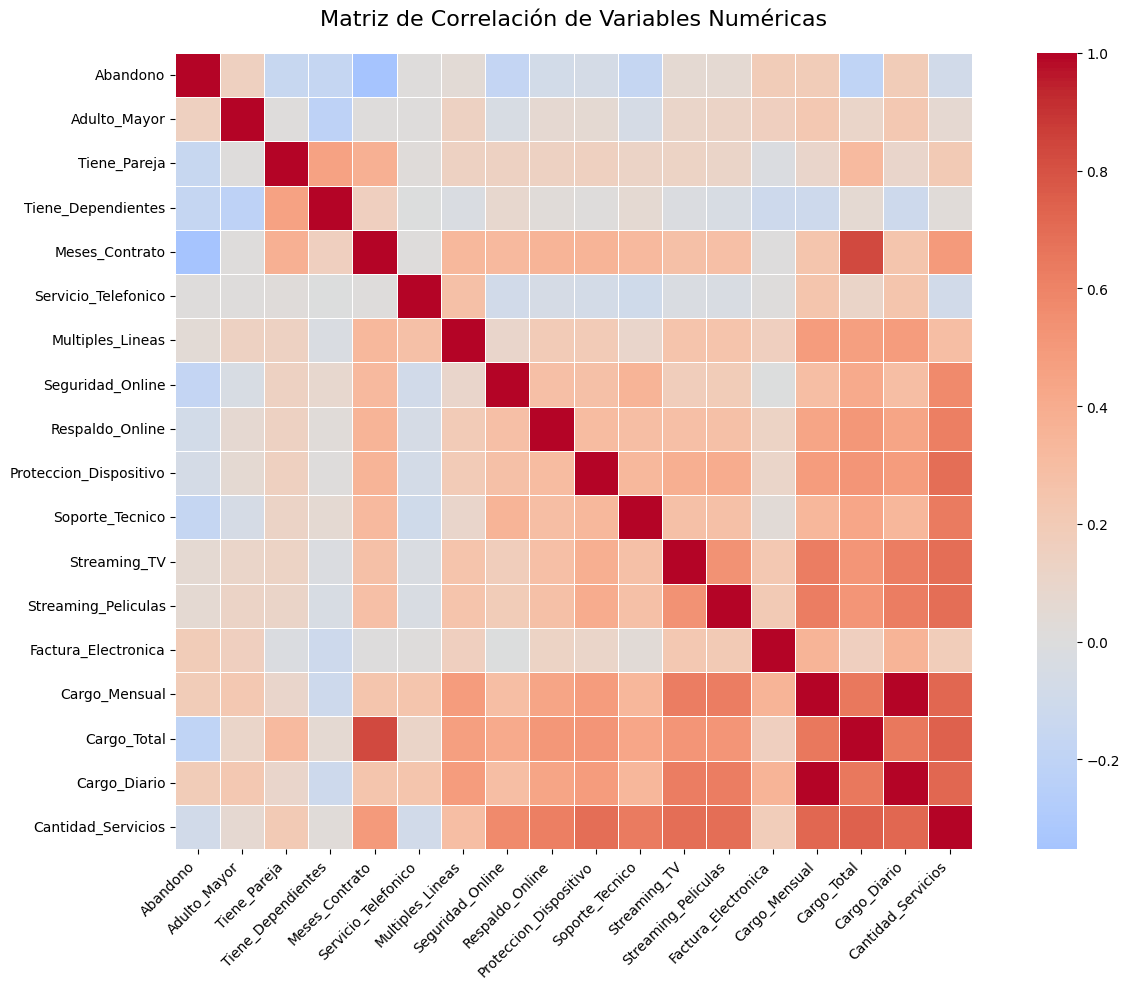

In [16]:
# Calcular matriz de correlación
correlation_matrix = df_numeric.corr()

# Tamaño del gráfico
plt.figure(figsize=(14, 10))

# Mapa de calor
sns.heatmap(
    correlation_matrix,
    annot=False,           # No mostrar números para no saturar
    cmap='coolwarm',       # Colores: rojo (+), azul (-), blanco (0)
    center=0,
    square=True,
    linewidths=0.5
)

plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [17]:
# Correlación con Abandono (ordenado de mayor a menor en valor absoluto)
correlacion_con_abandono = correlation_matrix['Abandono'].sort_values(key=abs, ascending=False)

print("\nCorrelación con Abandono (ordenado por valor absoluto):")
print(correlacion_con_abandono)


Correlación con Abandono (ordenado por valor absoluto):
Abandono                  1.000000
Meses_Contrato           -0.352229
Cargo_Total              -0.198324
Cargo_Diario              0.193412
Cargo_Mensual             0.193356
Factura_Electronica       0.191825
Seguridad_Online         -0.171226
Soporte_Tecnico          -0.164674
Tiene_Dependientes       -0.164221
Adulto_Mayor              0.150889
Tiene_Pareja             -0.150448
Cantidad_Servicios       -0.087698
Respaldo_Online          -0.082255
Proteccion_Dispositivo   -0.066160
Streaming_TV              0.063228
Streaming_Peliculas       0.061382
Multiples_Lineas          0.040102
Servicio_Telefonico       0.011942
Name: Abandono, dtype: float64


* A mayor tiempo con la  empresa, menos probabilidad de abandono (Meses_Contrato)
* Clientes que  han pagado tienden a no  abandonar (Cargo_Total)
* A mayor costo mensual, más probabilidad de abandono (Cargo_Diario, Cargo_Mensual)
* Clientes con factura electrónica tienen más posibilidad de abandonar. Quizás por ser clientes digitales, se les  hace  más sencillo cancelar, o los planes con factura electrónica son más caros o menos personalizados.
* Los servicios de valor agregado (seguridad, soporte) y el perfil familiar (pareja, dependientes) ayudan a retener clientes.
* Adultos mayores,  servicios de streaming y múltiples líneas aumentan el riesgo de abandono, sin embargo son variables de correlación positiva moderada.
* Cago_Total y Cargo_Diario pueden eliminarse, la primera por riesgo de data leakage, y  la segunda por ser redundante en relación con Cargo_Mensual


In [18]:
# Eliminar columnas problemáticas
columnas_a_eliminar = ['Cargo_Total', 'Cargo_Diario']
df_modelo = df_encoded.drop(columns=columnas_a_eliminar)

# Verificar
print("Columnas finales para modelado:")
print(df_modelo.columns.tolist())

Columnas finales para modelado:
['Abandono', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Meses_Contrato', 'Servicio_Telefonico', 'Multiples_Lineas', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Factura_Electronica', 'Cargo_Mensual', 'Cantidad_Servicios', 'Genero_Femenino', 'Genero_Masculino', 'Internet_DSL', 'Internet_Fibra Óptica', 'Internet_Sin Internet', 'Contrato_Dos años', 'Contrato_Mes a mes', 'Contrato_Un año', 'Pago_Cheque electrónico', 'Pago_Cheque por correo', 'Pago_Tarjeta de crédito', 'Pago_Transferencia bancaria']
